In [ ]:
from keras.datasets               import fashion_mnist
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers  import RMSprop
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 

import matplotlib.pyplot as plt
import numpy as np

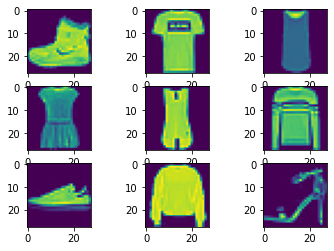

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

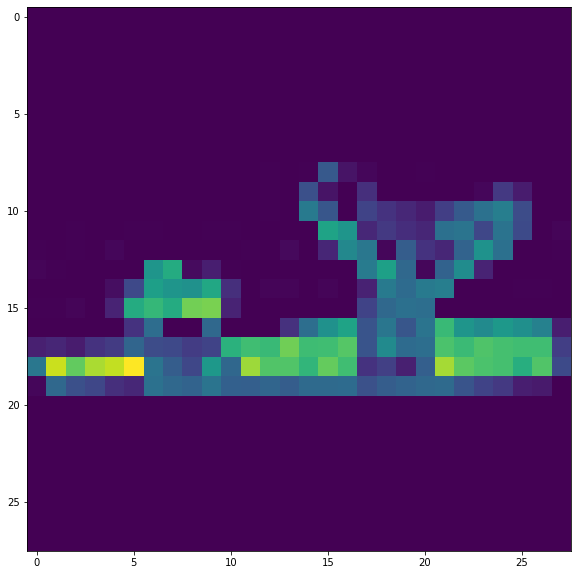

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[59999])

x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
model=Sequential()
model.add(Dense(512,kernel_initializer='normal',activation = 'relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 28, 28, 512)       1024      
                                                                 
 dropout_68 (Dropout)        (None, 28, 28, 512)       0         
                                                                 
 dense_118 (Dense)           (None, 28, 28, 512)       262656    
                                                                 
 dropout_69 (Dropout)        (None, 28, 28, 512)       0         
                                                                 
 dense_119 (Dense)           (None, 28, 28, 10)        5130      
                                                                 
Total params: 268,810
Trainable params: 268,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Biên dịch
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
#Training
history = model.fit(x_train,y_train,
                    batch_size=128,
                    epochs=20,verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
model.save('fashion_Mnist_model.h5')

Epoch 1/20
469/469 [==============================] - 127s 269ms/step - loss: 0.6899 - accuracy: 0.7415 - val_loss: 0.4943 - val_accuracy: 0.8173
Epoch 2/20
469/469 [==============================] - 122s 259ms/step - loss: 0.4557 - accuracy: 0.8325 - val_loss: 0.3841 - val_accuracy: 0.8607
Epoch 3/20
469/469 [==============================] - 122s 261ms/step - loss: 0.3895 - accuracy: 0.8562 - val_loss: 0.3485 - val_accuracy: 0.8743
Epoch 4/20
469/469 [==============================] - 122s 260ms/step - loss: 0.3501 - accuracy: 0.8716 - val_loss: 0.3115 - val_accuracy: 0.8876
Epoch 5/20
469/469 [==============================] - 124s 265ms/step - loss: 0.3255 - accuracy: 0.8799 - val_loss: 0.3081 - val_accuracy: 0.8879
Epoch 6/20
469/469 [==============================] - 120s 257ms/step - loss: 0.3064 - accuracy: 0.8865 - val_loss: 0.2919 - val_accuracy: 0.8936
Epoch 7/20
469/469 [==============================] - 123s 263ms/step - loss: 0.2951 - accuracy: 0.8914 - val_loss: 0.3009 -

<function matplotlib.pyplot.show>

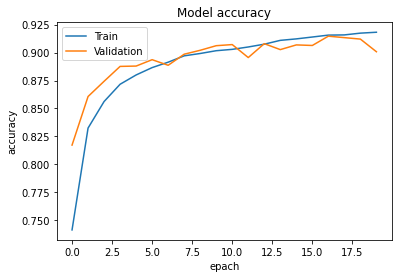

In [ ]:
#Vẽ đồ thị
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epach')
plt.legend(['Train','Validation'],loc='upper left')
plt.show


In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:',score[0])
print('Test accuracy', score[1])

Test loss: 0.26722368597984314
Test accuracy 0.9006999731063843


Giá trị dự đoán: 5


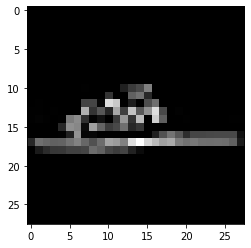

In [ ]:
plt.imshow(x_test[1456].reshape(28,28), cmap='gray')
y_predict = model.predict(x_test[1456].reshape(1,28,28,1))
print('Giá trị dự đoán:', np.argmax(y_predict))
plt.show()


Giá trị dự đoán:  6


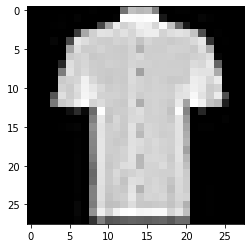

Giá trị dự đoán:  1


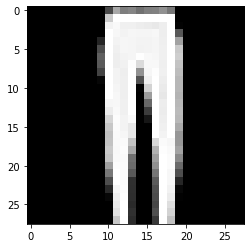

In [ ]:
for i in range(40,42):
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  y_predict = model.predict(x_test[i].reshape(1, 28,28,1))
  print('Giá trị dự đoán: ', np.argmax(y_predict))
  plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving giay.png to giay.png


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('giay.png', color_mode = "grayscale", target_size=(28,28))
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img = img / 255.0

# load model
model = load_model('fashion_Mnist_model.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))

Giá trị dự đoán: 2
